In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt

In [30]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn import compose
from sklearn import pipeline
from sklearn import metrics
from sklearn import set_config
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
set_config(display="diagram")

In [4]:
diabetes_data = pd.read_csv("8k_diabetes.csv", delimiter=',')

In [5]:
X = diabetes_data[["race", "gender"]]
Y = diabetes_data.loc[:,"readmitted"].astype(int)

In [6]:
Y.sum()/len(Y)

0.39725

In [7]:
log_elastic = linear_model.LogisticRegression(
    solver = "saga",
    penalty="elasticnet",
    l1_ratio=0.5,
    max_iter=10000
)

log_lasso = linear_model.LogisticRegression(
    solver = "saga",
    penalty="l1",
    max_iter=10000
)

log_ridge = linear_model.LogisticRegression(
    solver = "saga",
    penalty="l2",
    max_iter=10000
)

In [7]:
def print_pipeline(model, X, Y, cv=5, scoring="accuracy"):
    pipe = pipeline.make_pipeline(column_trans, model)
    print(model_selection.cross_val_score(pipe, X, Y, cv=cv, scoring=scoring).mean())
    pipe.fit(X,Y)
    metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

The initial model will be trained on race and gender, two categorical variables.

Create a column transformer to encode race and gender. All other columns will be left as is with this transfomer.

In [8]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(sparse=False), ["race", "gender"]),
     remainder="passthrough"
)

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


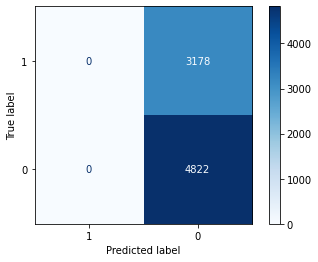

In [9]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
print(model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="accuracy").mean())
pipe.fit(X,Y)
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


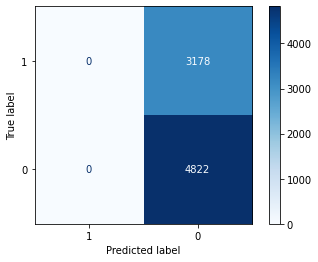

In [10]:
print_pipeline(log_elastic, X, Y, cv=5, scoring="accuracy")

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


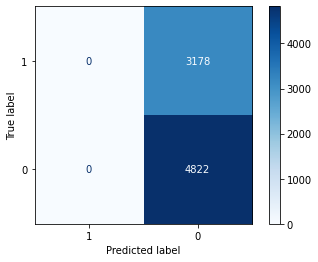

In [11]:
print_pipeline(log_lasso, X, Y, cv=5, scoring="accuracy")

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


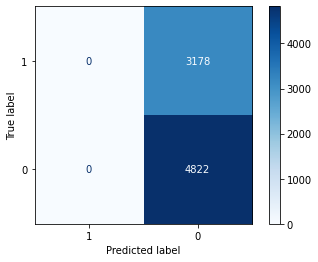

In [12]:
print_pipeline(log_ridge, X, Y, cv=5, scoring="accuracy")

As we can see from the confusion matrix above, we have created a naive model that classifies every patient as "not readmitted".

I will now try the same procedue without using pipeline functionality.

In [13]:
pd.get_dummies(X)

,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
7995,0,0,0,1,0,0,0,1
7996,0,0,0,1,0,0,1,0
7997,0,0,0,1,0,0,0,1
7998,0,0,0,1,0,0,0,1


In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(pd.get_dummies(X), Y)

In [15]:
log_reg_lbfgs = linear_model.LogisticRegression(
    solver="lbfgs"
)
log_reg_lbfgs.fit(x_train, y_train)

LogisticRegression()

In [16]:
log_reg_lbfgs.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
log_reg_lbfgs.score(x_test, y_test)

0.604

Now I will go back to using the data pipeline and add new features to the model.

In [18]:
X = diabetes_data[["race", "gender", "num_medications"]]

<AxesSubplot:>

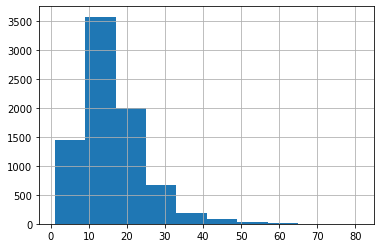

In [19]:
X["num_medications"].hist()

0.601


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


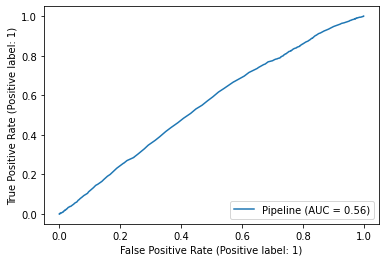

In [20]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
print(model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="accuracy").mean())
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


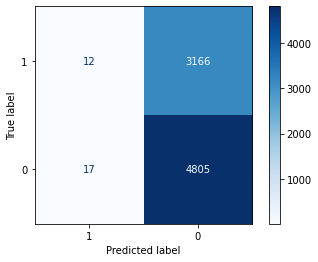

In [21]:
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

In [22]:
X = diabetes_data[[
    "race",
    "gender",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient"
]]


In [23]:
X

,race,gender,num_medications,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient
0,Caucasian,Female,21,1,35,4,0
1,Caucasian,Female,5,2,8,5,0
2,Caucasian,Male,21,7,12,0,0
3,AfricanAmerican,Female,5,4,33,1,0
4,AfricanAmerican,Female,13,5,31,0,0
...,...,...,...,...,...,...,...
7995,Caucasian,Male,27,8,56,2,0
7996,Caucasian,Female,18,2,44,0,0
7997,Caucasian,Male,16,1,25,0,0
7998,Caucasian,Male,22,7,61,0,0


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


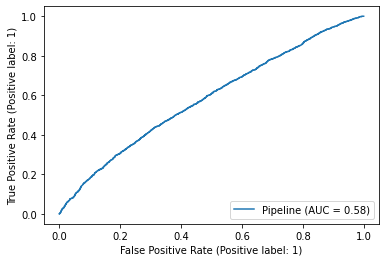

In [24]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

In [25]:
X = diabetes_data[[
    "race",
    "gender",
    "admission_type_id",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses"
]]

In [27]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(sparse=False), ["race", "gender", "admission_type_id"]),
     remainder="passthrough"
)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


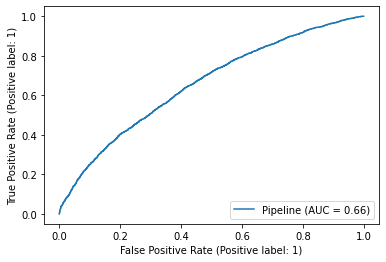

In [28]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

In [29]:
diabetes_data

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,Caucasian,Female,[50-60),?,Elective,Discharged to home,Physician Referral,1,CP,Surgery-Neuro,...,No,No,No,No,No,No,False,Spinal stenosis in cervical region,Spinal stenosis in cervical region,"Effusion of joint, site unspecified"
1,Caucasian,Female,[20-30),[50-75),Urgent,Discharged to home,Physician Referral,2,UN,?,...,No,No,No,No,No,No,False,"First-degree perineal laceration, unspecified ...","Diabetes mellitus of mother, complicating preg...",Sideroblastic anemia
2,Caucasian,Male,[80-90),?,Not Available,Discharged/transferred to home with home healt...,NaN,7,MC,Family/GeneralPractice,...,No,No,No,No,No,Yes,True,Pneumococcal pneumonia [Streptococcus pneumoni...,"Congestive heart failure, unspecified",Hyperosmolality and/or hypernatremia
3,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Transfer from another health care facility,4,UN,?,...,No,No,No,No,No,Yes,False,Cellulitis and abscess of face,Streptococcus infection in conditions classifi...,Diabetes mellitus without mention of complicat...
4,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Emergency Room,5,?,Psychiatry,...,No,No,No,No,Ch,Yes,False,"Bipolar I disorder, single manic episode, unsp...",Diabetes mellitus without mention of complicat...,Depressive type psychosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Caucasian,Male,[70-80),?,Elective,Discharged/transferred to SNF,Physician Referral,8,?,Surgery-Cardiovascular/Thoracic,...,No,No,No,No,No,Yes,False,Atherosclerosis of aorta,Cerebral thrombosis without mention of cerebra...,Paroxysmal supraventricular tachycardia
7996,Caucasian,Female,[50-60),?,Urgent,Discharged to home,Emergency Room,2,UN,Emergency/Trauma,...,No,No,No,No,Ch,Yes,False,Disorders of mineral metabolism,Alteration of consciousness,Disorders of mineral metabolism
7997,Caucasian,Male,[50-60),?,Emergency,Discharged/transferred to another short term h...,NaN,1,?,?,...,No,No,No,No,Ch,Yes,False,Coronary atherosclerosis of unspecified type o...,Postmyocardial infarction syndrome,Hyperosmolality and/or hypernatremia
7998,Caucasian,Male,[80-90),?,Urgent,Discharged/transferred to SNF,Emergency Room,7,MC,Surgery-General,...,No,No,No,No,Ch,Yes,False,"Congestive heart failure, unspecified",Paroxysmal supraventricular tachycardia,Endomyocardial fibrosis


In [6]:
X = diabetes_data[[
    "race",
    "gender",
    "admission_type_id",
    "insulin",
    "diabetesMed",
    "change",
    "payer_code",
    "A1Cresult",
    "metformin",
    "repaglinide",
    "nateglinide",
    "chlorpropamide",
    "glimepiride",
    "glipizide",
    "glyburide",
    "tolbutamide",
    "pioglitazone",
    "rosiglitazone",
    "acarbose",
    "miglitol",
    "tolazamide",
    "glyburide.metformin",
    "glipizide.metformin",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses",
]]

In [7]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(
        sparse=True,
        handle_unknown="ignore"
    ),[
        "race",
        "gender",
        "admission_type_id",
        "insulin",
        "diabetesMed",
        "change",
        "payer_code",
        "A1Cresult",
        "metformin",
        "repaglinide",
        "nateglinide",
        "chlorpropamide",
        "glimepiride",
        "glipizide",
        "glyburide",
        "tolbutamide",
        "pioglitazone",
        "rosiglitazone",
        "acarbose",
        "miglitol",
        "tolazamide",
        "glyburide.metformin",
        "glipizide.metformin",
    ]),
    remainder="passthrough",
)

In [10]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y);

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


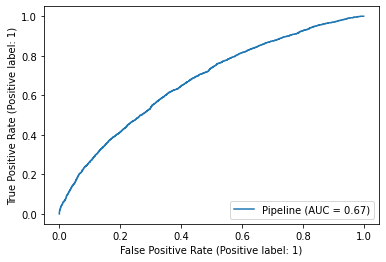

In [11]:
metrics.plot_roc_curve(pipe, X, Y)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


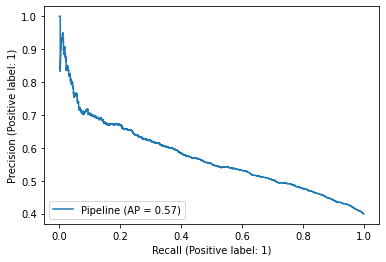

In [12]:
metrics.plot_precision_recall_curve(pipe, X, Y)

Exclude the following features for homogeneity of values:

acetohexamide

troglitazone

examide

citoglipton

glimepiride.pioglitazone

metformin.rosiglitazone

metformin.pioglitazone

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


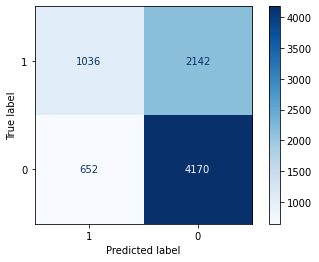

In [40]:
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

In [13]:
model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="accuracy").mean()

0.642625

In [15]:
model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="recall").mean()

0.3193735452879711

In [16]:
model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="f1").mean()

0.4150626040177624

In [7]:
pipe

NameError: name 'pipe' is not defined

Now that I have improved performance somewhat by adding all the availible features, I will try scaling my numerical features using StandardScalar. I will also refactor my pipleine to make it more concise.

In [8]:
scaler = preprocessing.StandardScaler()
num_cols = compose.make_column_selector(dtype_include="number")
cat_cols = compose.make_column_selector(dtype_exclude="number")
one_hot_encoder = preprocessing.OneHotEncoder(sparse=True, handle_unknown="ignore")

In [9]:
column_trans = compose.make_column_transformer(
    (pipeline.make_pipeline(one_hot_encoder), cat_cols),
    (pipeline.make_pipeline(scaler), num_cols)
)

In [29]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)

In [30]:
pipe.fit(X,Y);

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


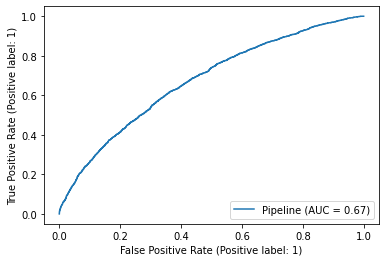

In [31]:
metrics.plot_roc_curve(pipe, X, Y)

In [10]:
sv_classifier = svm.SVC()

In [11]:
pipe = pipeline.make_pipeline(column_trans, sv_classifier)

In [12]:
pipe.fit(X,Y);

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


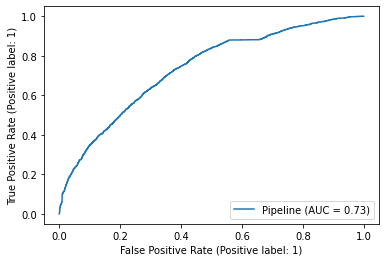

In [13]:
metrics.plot_roc_curve(pipe, X, Y)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


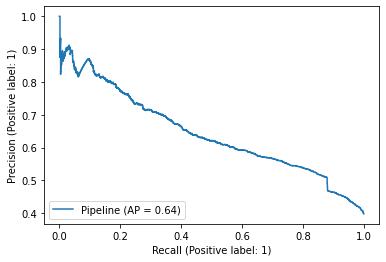

In [14]:
metrics.plot_precision_recall_curve(pipe, X, Y)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


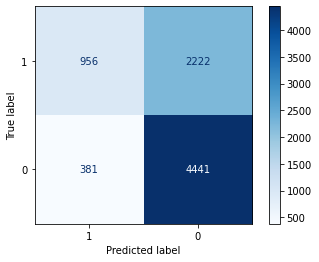

In [43]:
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

It seems like the SVC performs better than logistic regression without any additional feature engineering. I will now perform hyperparameter optimization over the SVC model.

In [15]:
params = {
    "svc__kernel": ["linear"],
    "svc__C": [0.1, 1, 10],
}

In [16]:
grid = model_selection.GridSearchCV(pipe, params, cv=3, verbose=2)

In [17]:
grid.fit(X,Y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   1.2s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   1.3s
[CV] END .....................svc__C=0.1, svc__kernel=linear; total time=   1.2s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   1.7s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   1.8s
[CV] END .......................svc__C=1, svc__kernel=linear; total time=   1.7s
[CV] END ......................svc__C=10, svc__kernel=linear; total time=  25.9s
[CV] END ......................svc__C=10, svc__kernel=linear; total time=  36.0s
[CV] END ......................svc__C=10, svc__kernel=linear; total time=  22.6s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a172fd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a1725e0>)])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear']},
             verbose=2)

Note that I tried doing a larger sweep over differenct kernel methods, but it took too long. Make sure to come back and redo with more compute.

In [19]:
grid.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

Just realized that the default kernel outperforms by best otimized linear kernel and is rbf. I will not try a sweep using an rbf kernel.

In [25]:
params = {
    "svc__kernel": ["rbf"],
    "svc__C": [0.1, 1, 10],
}
grid = model_selection.GridSearchCV(pipe, params, cv=3, verbose=2)
grid.fit(X,Y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ........................svc__C=0.1, svc__kernel=rbf; total time=   1.6s
[CV] END ........................svc__C=0.1, svc__kernel=rbf; total time=   1.6s
[CV] END ........................svc__C=0.1, svc__kernel=rbf; total time=   1.6s
[CV] END ..........................svc__C=1, svc__kernel=rbf; total time=   1.6s
[CV] END ..........................svc__C=1, svc__kernel=rbf; total time=   1.6s
[CV] END ..........................svc__C=1, svc__kernel=rbf; total time=   1.6s
[CV] END .........................svc__C=10, svc__kernel=rbf; total time=   1.9s
[CV] END .........................svc__C=10, svc__kernel=rbf; total time=   1.8s
[CV] END .........................svc__C=10, svc__kernel=rbf; total time=   1.8s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a172fd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a1725e0>)])),
                                       ('svc', SVC(C=0.1, kernel='linear'))]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__kernel': ['rbf']},
             verbose=2)

In [26]:
grid.best_params_

{'svc__C': 1, 'svc__kernel': 'rbf'}

In [28]:
params = {
    "svc__kernel": ["rbf"],
    "svc__C": [0.1, 1, 10],
    "svc__gamma": [0.1, 1, 10]
}
grid = model_selection.GridSearchCV(pipe, params, cv=3, verbose=2)
grid.fit(X,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.7s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.7s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.6s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.0s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   1.9s
[CV] END .........svc__C=0.1, svc__gamma=10, svc__kernel=rbf; total time=   2.1s
[CV] END .........svc__C=0.1, svc__gamma=10, svc__kernel=rbf; total time=   2.0s
[CV] END .........svc__C=0.1, svc__gamma=10, svc__kernel=rbf; total time=   2.0s
[CV] END ..........svc__C=1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.8s
[CV] END ..........svc__C=1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.7s
[CV] END ..........svc__C=1, svc__gamma=0.1, svc_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a172fd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f429a1725e0>)])),
                                       ('svc', SVC(C=0.1, kernel='linear'))]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [0.1, 1, 10],
                         'svc__kernel': ['rbf']},
             verbose=2)

In [29]:
grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Now I will take a crack at the text data using tf-idf.

In [62]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_data["diag_1_desc"],Y)

In [54]:
corpus = diabetes_data["diag_1_desc"]
vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2)
)
vectorizer.fit_transform(x_train)


array(['abdominal', 'abdominal pain', 'abdominal pregnancy', ...,
       'wound unspecified', 'zoster', 'zoster meningitis'], dtype=object)

In [77]:
pipe = pipeline.make_pipeline(vectorizer, sv_classifier)

In [78]:
pipe.fit(corpus, Y)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [81]:
X.shape, Y.shape

((8000, 31), (8000,))

In [82]:
type(X), type(Y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)